In [3]:
import re
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# https://www.youtube.com/watch?v=ZBovy3gUxCE

analyser = SentimentIntensityAnalyzer()
df = pd.read_csv('spongebob.csv', encoding='utf-16', sep=';', dtype='str')
df.head()

,Unnamed: 0,char,text,ep
0,0,Narrator,"Ah, the sea... so fascinating. So wonderful. H...",Help Wanted
1,1,SpongeBob,"Today's the big day, Gary.",Help Wanted
2,2,Gary,Meow.,Help Wanted
3,3,SpongeBob,"Look at me, I'm... ...naked! Gotta be in top...",Help Wanted
4,4,Gary,Meow.,Help Wanted


In [4]:
temp = df.groupby(by='char').count().sort_values(by='text', ascending=False)['text'][:10]
df_c = pd.DataFrame(temp.index)
df_c['lines']=temp.values

temp = df[df['char'].isin(temp.index.tolist())]
temp = temp.groupby(by='char')['ep'].nunique().sort_values(ascending=False)
df_ep = pd.DataFrame(temp.index)
df_ep['episodes']=temp.values

df_c = df_c.merge(temp, left_on='char', right_on='char')

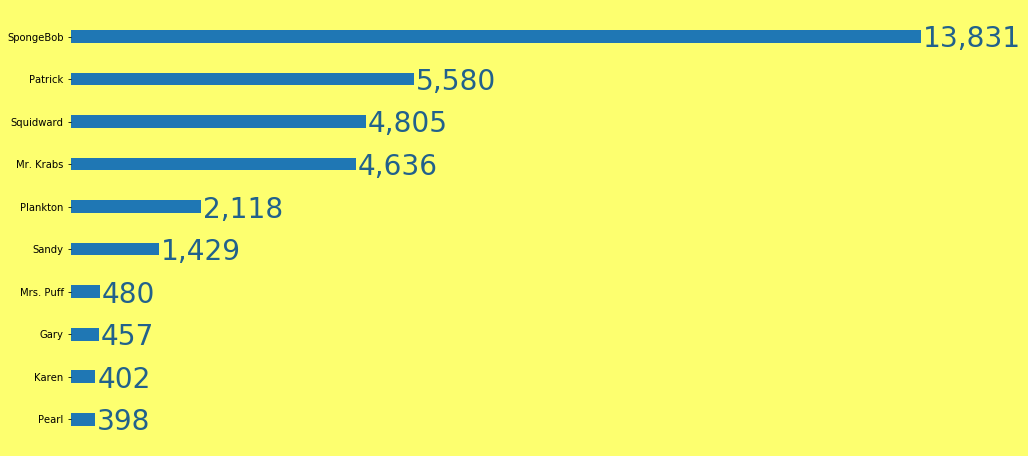

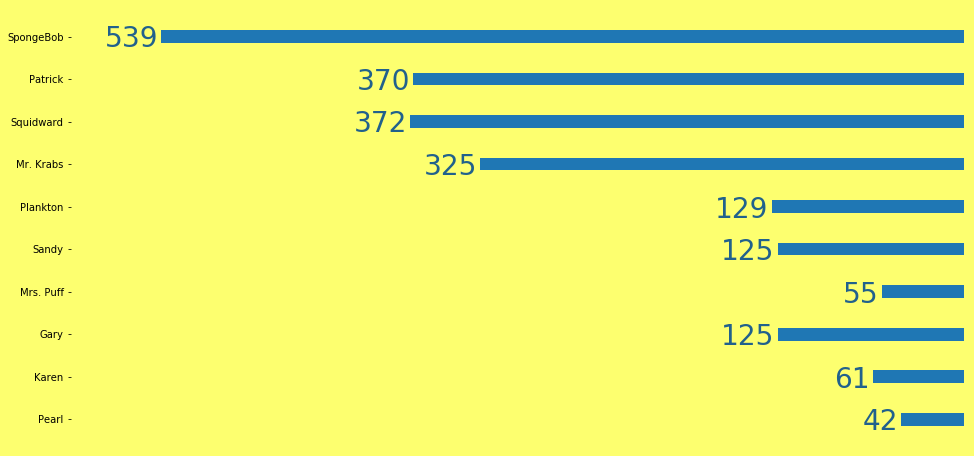

In [5]:
df_c = df_c.sort_values(by='lines')
df_c= df_c.reset_index(drop=True)

ind = np.arange(len(df_c['lines']))

fig, ax = plt.subplots(1,figsize=(16,8), facecolor='#FDFF6F')
barcollection = plt.barh(ind, df_c['lines'], height=0.3)
ax.set(yticks=ind, yticklabels=df_c['char'])
ax.set_facecolor('#FDFF6F')

for idx, b in enumerate(barcollection):
        adj= 30
        b.set_width(df_c['lines'][idx])
        plt.text(df_c['lines'][idx] + adj, idx -0.25, "{:,.0f}".format(df_c['lines'][idx]),fontsize=28, color='#21618C')

ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)        
plt.xticks([])

plt.show()

fig, ax = plt.subplots(1,figsize=(16,8), facecolor='#FDFF6F')
barcollection = plt.barh(ind, df_c['ep'], height=0.3)
ax.set(yticks=ind, yticklabels=df_c['char'])
ax.set_facecolor('#FDFF6F')
plt.xlim(600, 0)

for idx, b in enumerate(barcollection):
        adj= 2
        b.set_width(df_c['ep'][idx])
        plt.text(df_c['ep'][idx] + adj, idx -0.25, "{:,.0f}".format(df_c['ep'][idx]),fontsize=28, color='#21618C', ha='right')

ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)        
plt.xticks([])

plt.show()


In [6]:
# top 10 characters with most lines
chars= temp.index.to_list()
chars

['SpongeBob',
 'Squidward',
 'Patrick',
 'Mr. Krabs',
 'Plankton',
 'Sandy',
 'Gary',
 'Karen',
 'Mrs. Puff',
 'Pearl']

In [7]:
# analyse sentiment for selected character
df=df.dropna()

results=[]
for name in chars:
    scores =[]
    sentences = df[df['char']==name]['text']

    for sentence in sentences:
        sentence = (re.sub("[\(\[].*?[\]\)]", "", sentence))
        if(~isinstance(sentence, float)):
            score = analyser.polarity_scores(sentence)
            if score['neu'] != 1:
                scores.append(score)

    df_pol= pd.DataFrame(scores)
    print(name)
    results.append(df_pol['compound'].mean())
    print(df_pol['compound'].mean())
    

SpongeBob
0.2412212437940946
Squidward
0.09882336730841827
Patrick
0.19750160427807487
Mr. Krabs
0.18256943396226416
Plankton
0.141685078125
Sandy
0.17945198511166255
Gary
-0.07721764705882356
Karen
0.12321320754716981
Mrs. Puff
0.14485369127516778
Pearl
0.19937024390243901


(-0.25, 0.25)

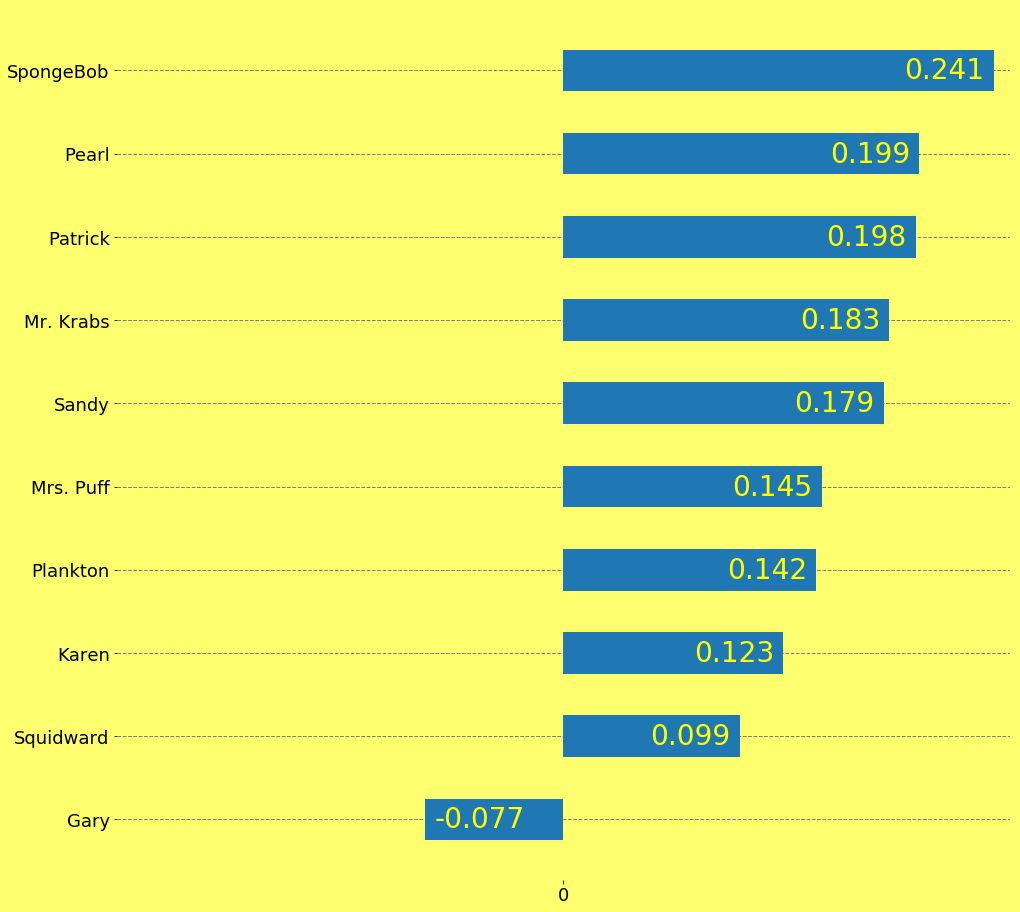

In [8]:
df_pol = pd.DataFrame(results)
df_pol.columns=['results']
df_pol['name']=chars
df_pol= df_pol.sort_values(by='results')
df_pol= df_pol.reset_index(drop=True)

fig, ax = plt.subplots(1, figsize = (16, 16), facecolor = '#FDFF6F') 
ax.set_facecolor('#FDFF6F')

ax.grid(color='gray', linestyle='dashed', linewidth=1, axis = 'y')
ax.set_axisbelow(True)

barcollection = plt.barh(df_pol['name'],df_pol['results'], height=0.5)
#plt.plot([0,0,0,0,0,0,0,0,0,0],df_pol['name'], linewidth=0.3)
ax.tick_params(axis='y', which='major', labelsize=18)

for idx, b in enumerate(barcollection):
        adj= -0.05
        if df_pol['results'][idx] < 0:
            adj=0.005
        b.set_width(df_pol['results'][idx])
        plt.text(df_pol['results'][idx] + adj, idx -0.1, "{:.3f}".format(df_pol['results'][idx]),fontsize=28, color='yellow')

ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)        
plt.xticks([0], fontsize=18)

plt.xlim(-0.25,0.25)

In [9]:
# check whats going on with gary, print all sentences that were classified with some 'negative' polarity in them
df=df.dropna()
name='Gary'

sentences = df[df['char']==name]['text']
for sentence in sentences:
    sentence = (re.sub("[\(\[].*?[\]\)]", "", sentence))
    if(~isinstance(sentence, float)):
        score = analyser.polarity_scores(sentence)
        if score['neg'] > 0:
            print(sentence)

Come.  For ages, dreams have been thought of as windows to another realm.  "Let me not mar that perfect dream by an auroral stain, but so adjust my daily night that it may come again." Emily Dickinson wrote that.
Here's one you might know.  There once was a man from Peru who dreamed he was eating his shoe. He woke with a fright in the middle of the night to find that his dream had come true.
Meeh… No.
Pu, pu, pow.
Meh. 
While I breathe fiery destruction upon my enemies.
Hello, stinky man.
Delightfully disgusting.
Greetings and salutations, grouchy man.
Ah, the naïve cephalopod style. Not very sophisticated.
Ugh! Tacky.
You watch this nonsense?


In [10]:
#prepare data for word clouds

stopwords = set(STOPWORDS)

def get_words(name):
    w = ' '
    for txt in df[df['char']==name]['text']:  
        temp = re.sub("[\(\[].*?[\]\)]", "", txt)
        tokens = temp.split() 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
        for words in tokens: 
            w = w + words + ' '
    return w

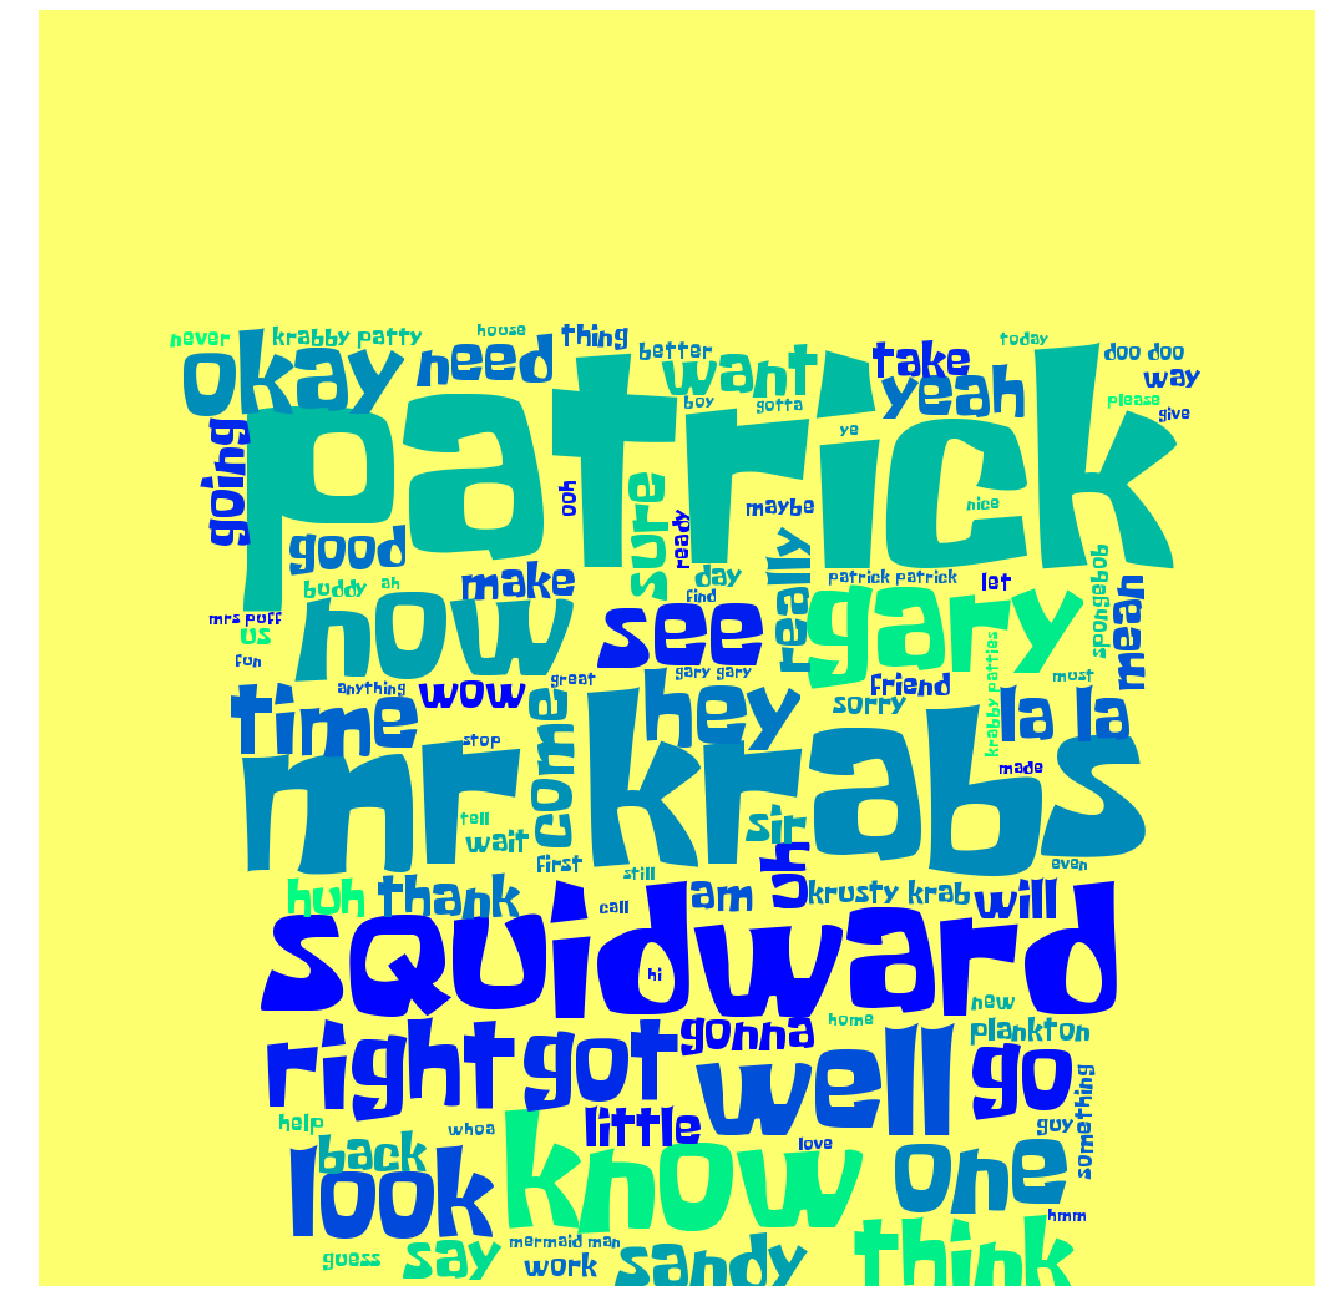

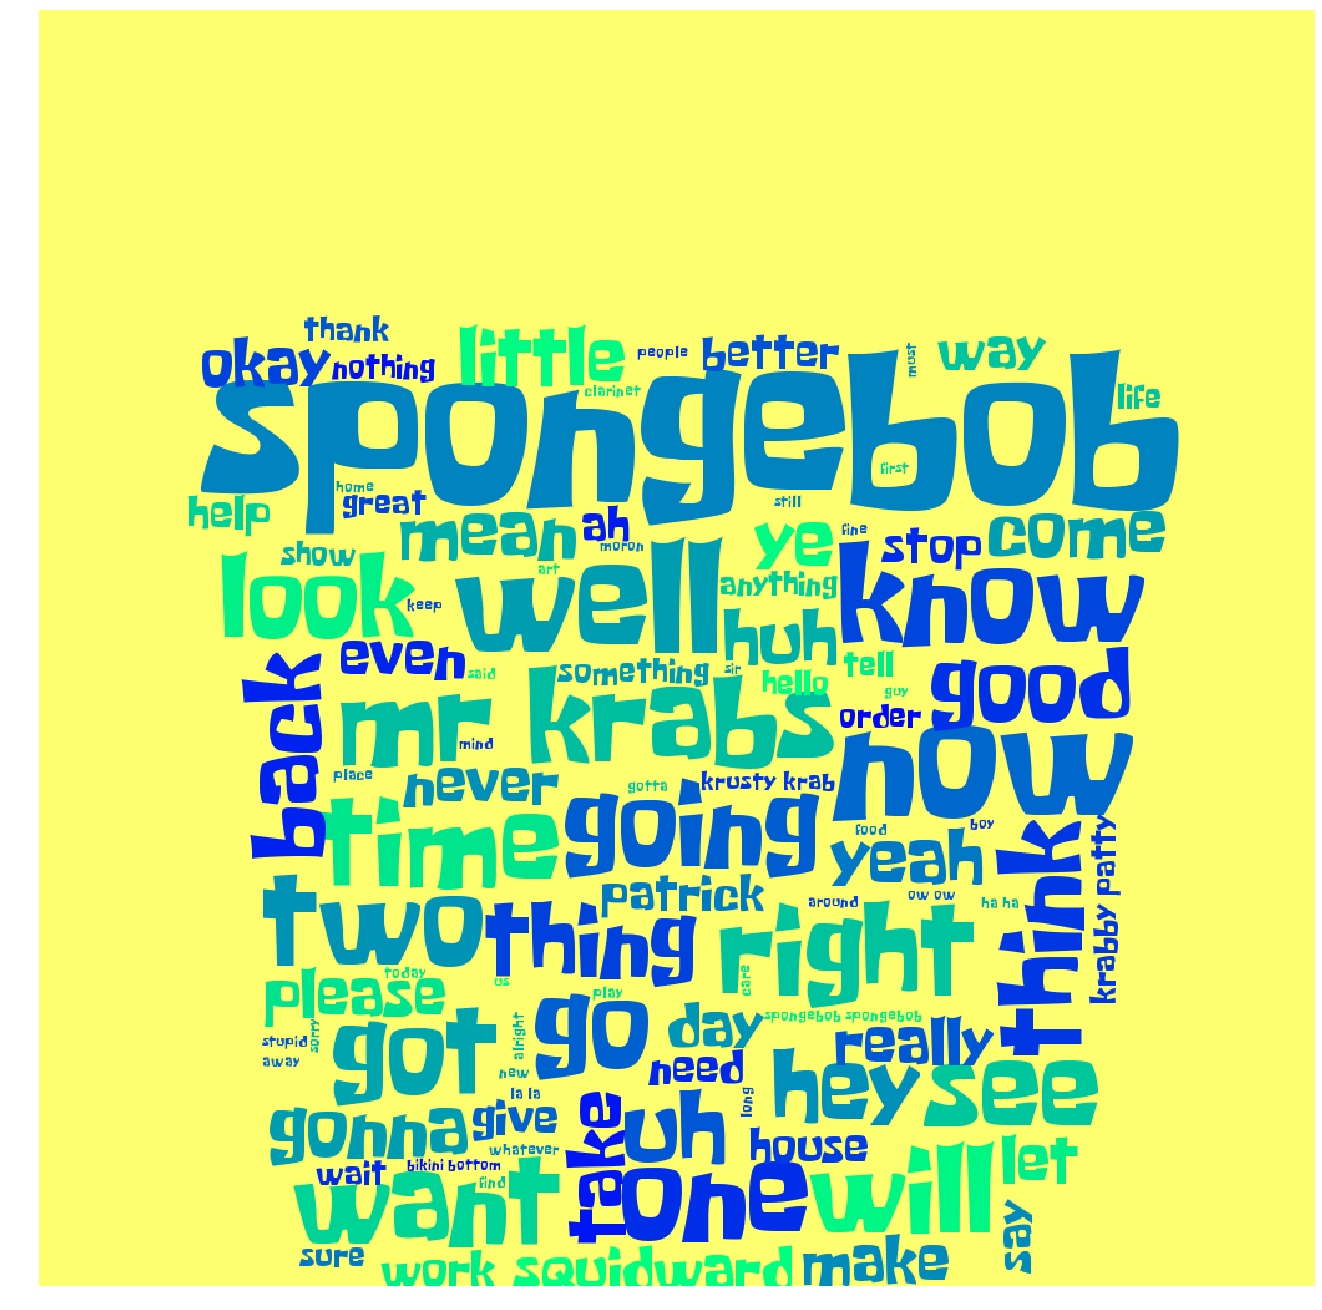

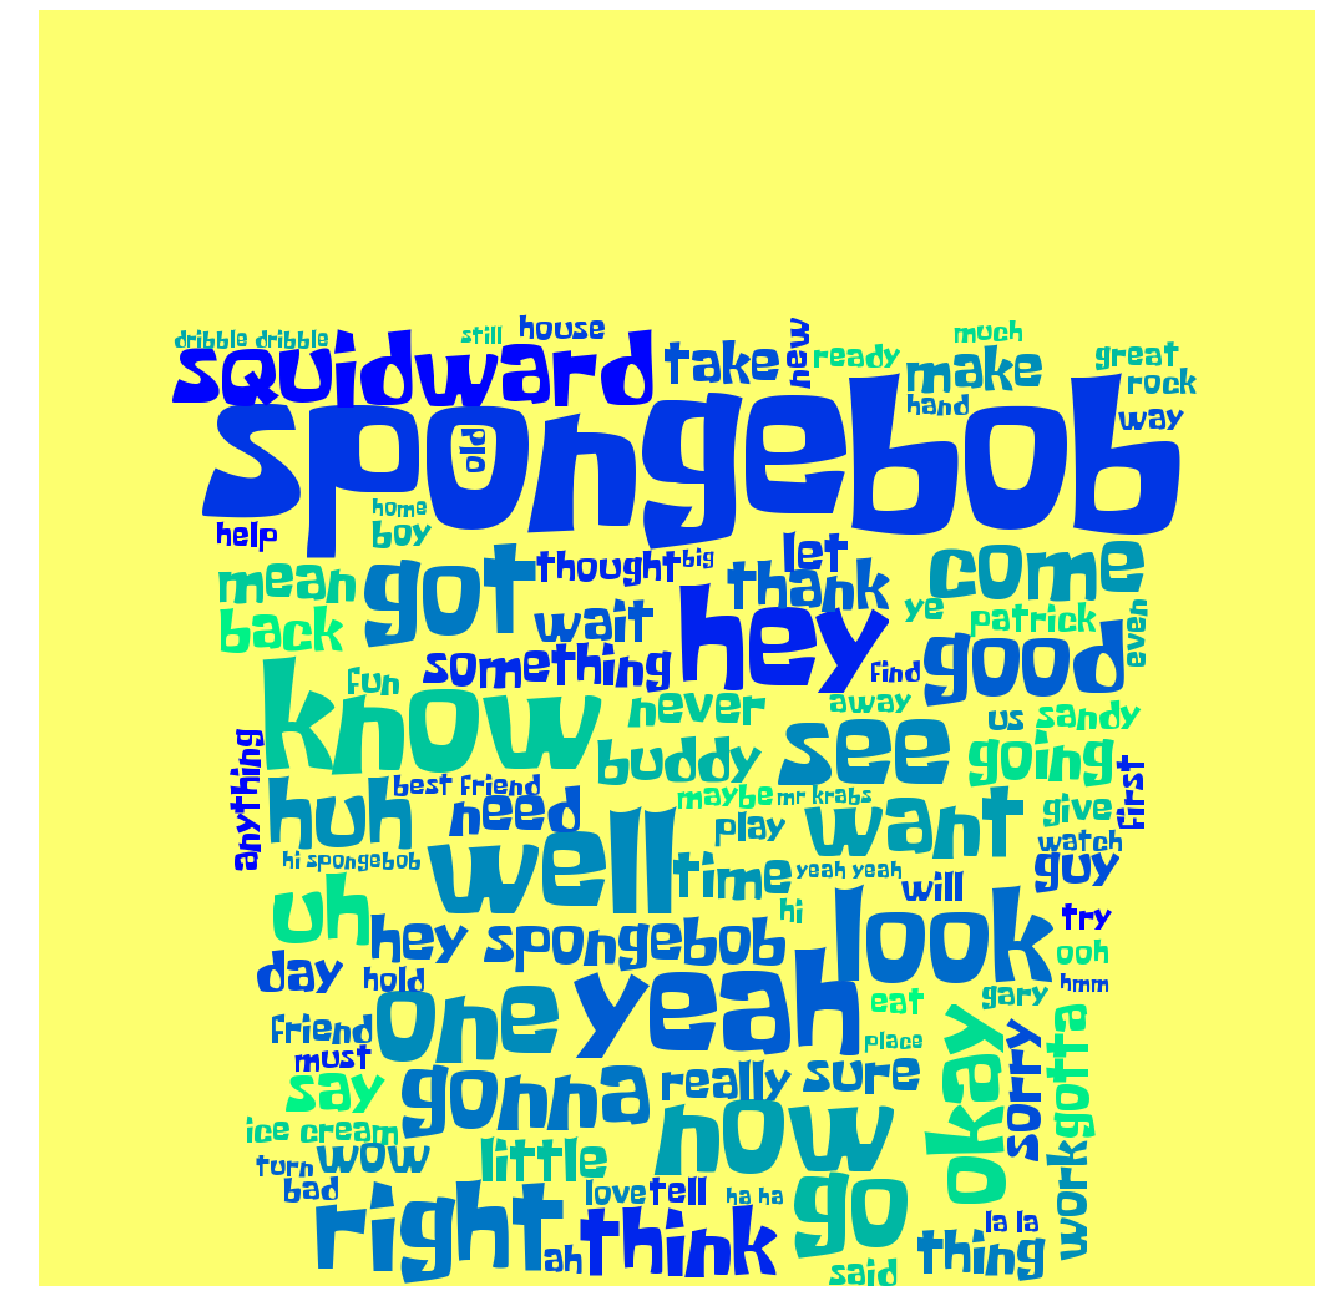

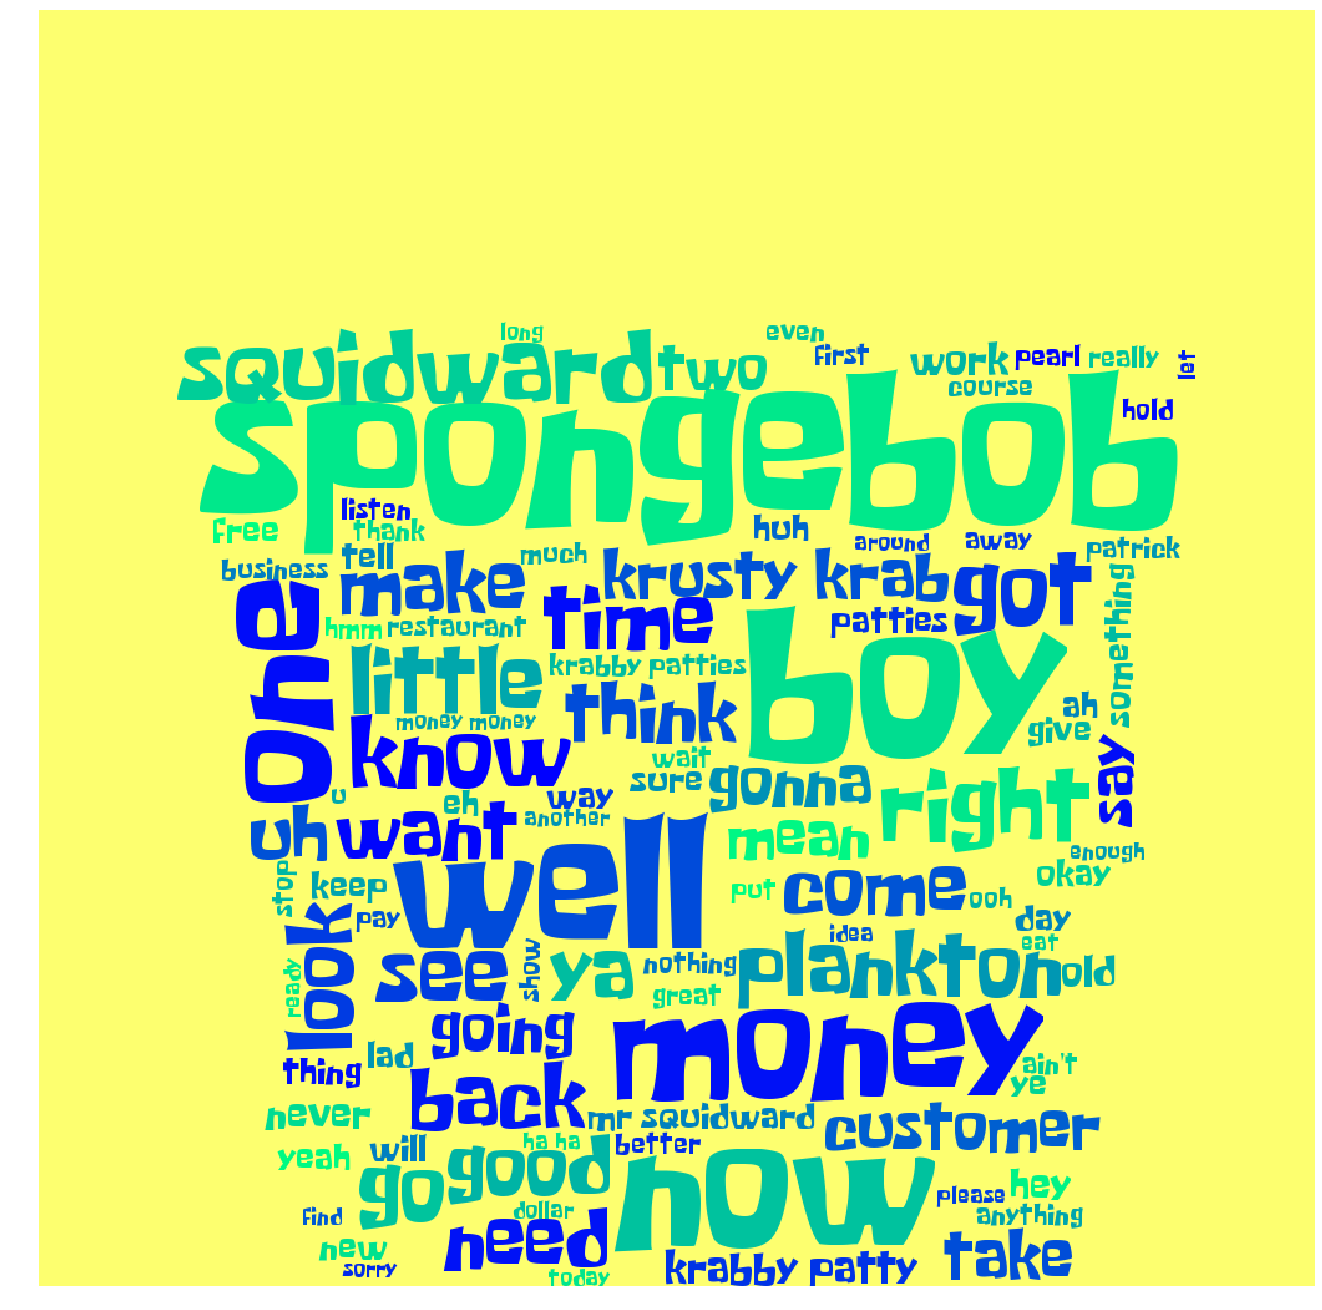

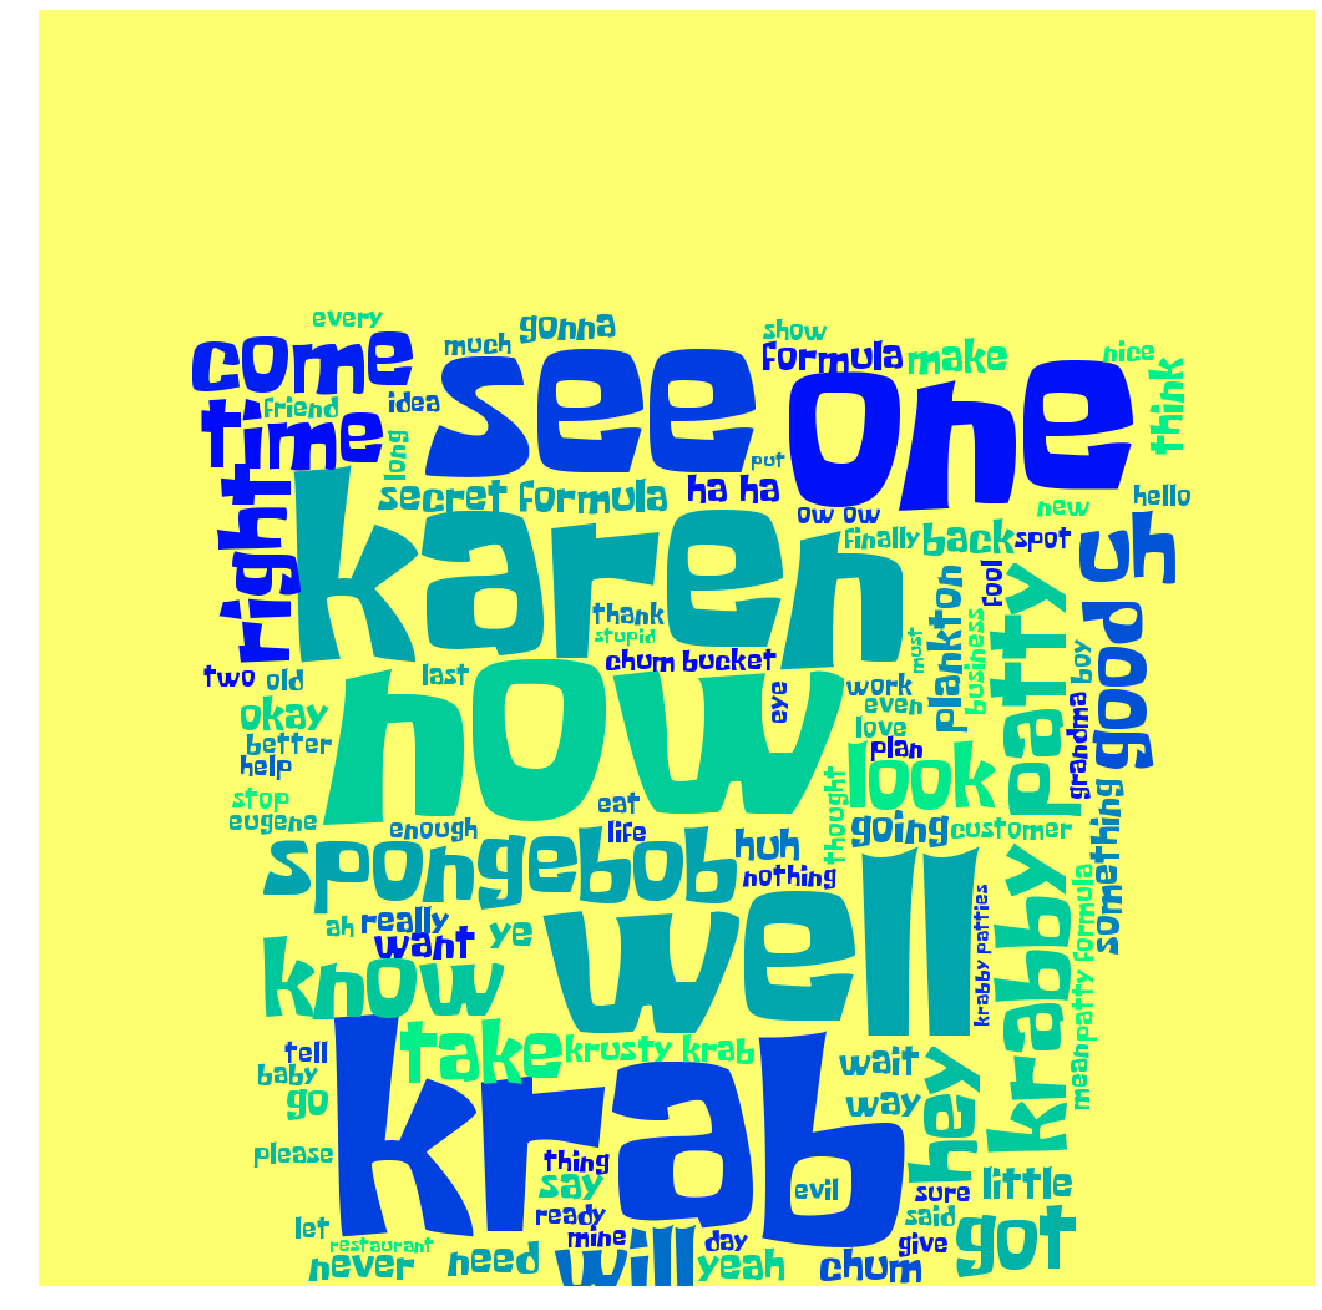

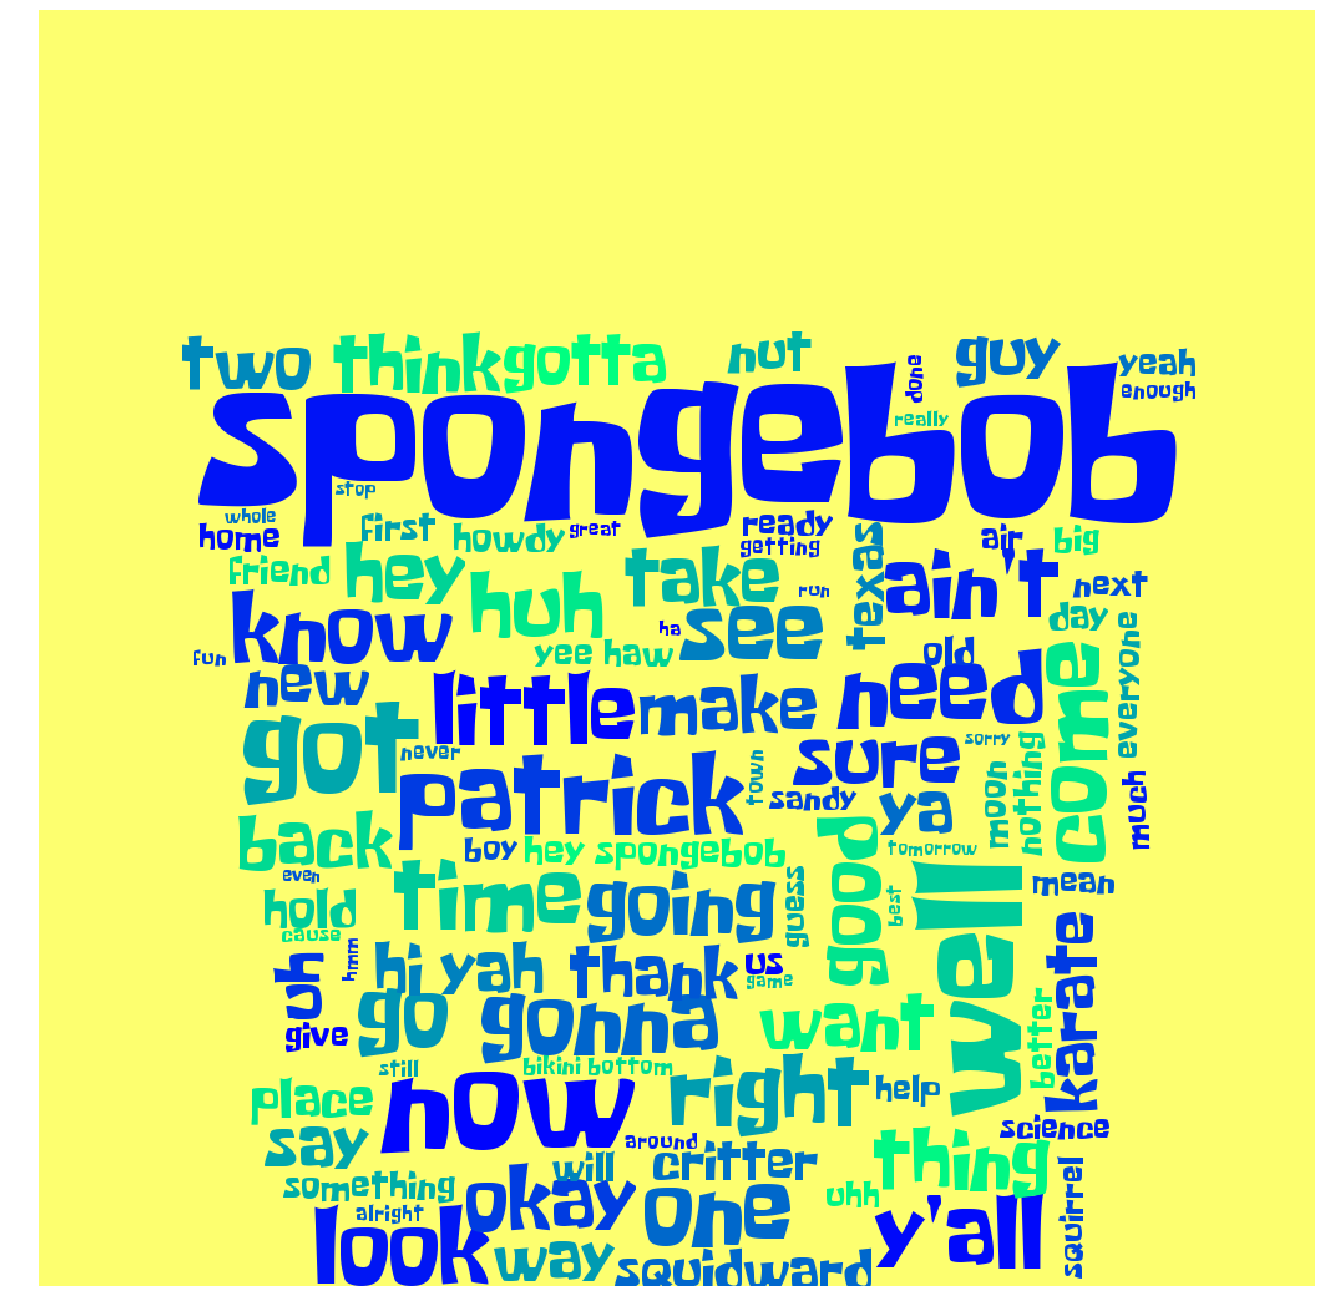

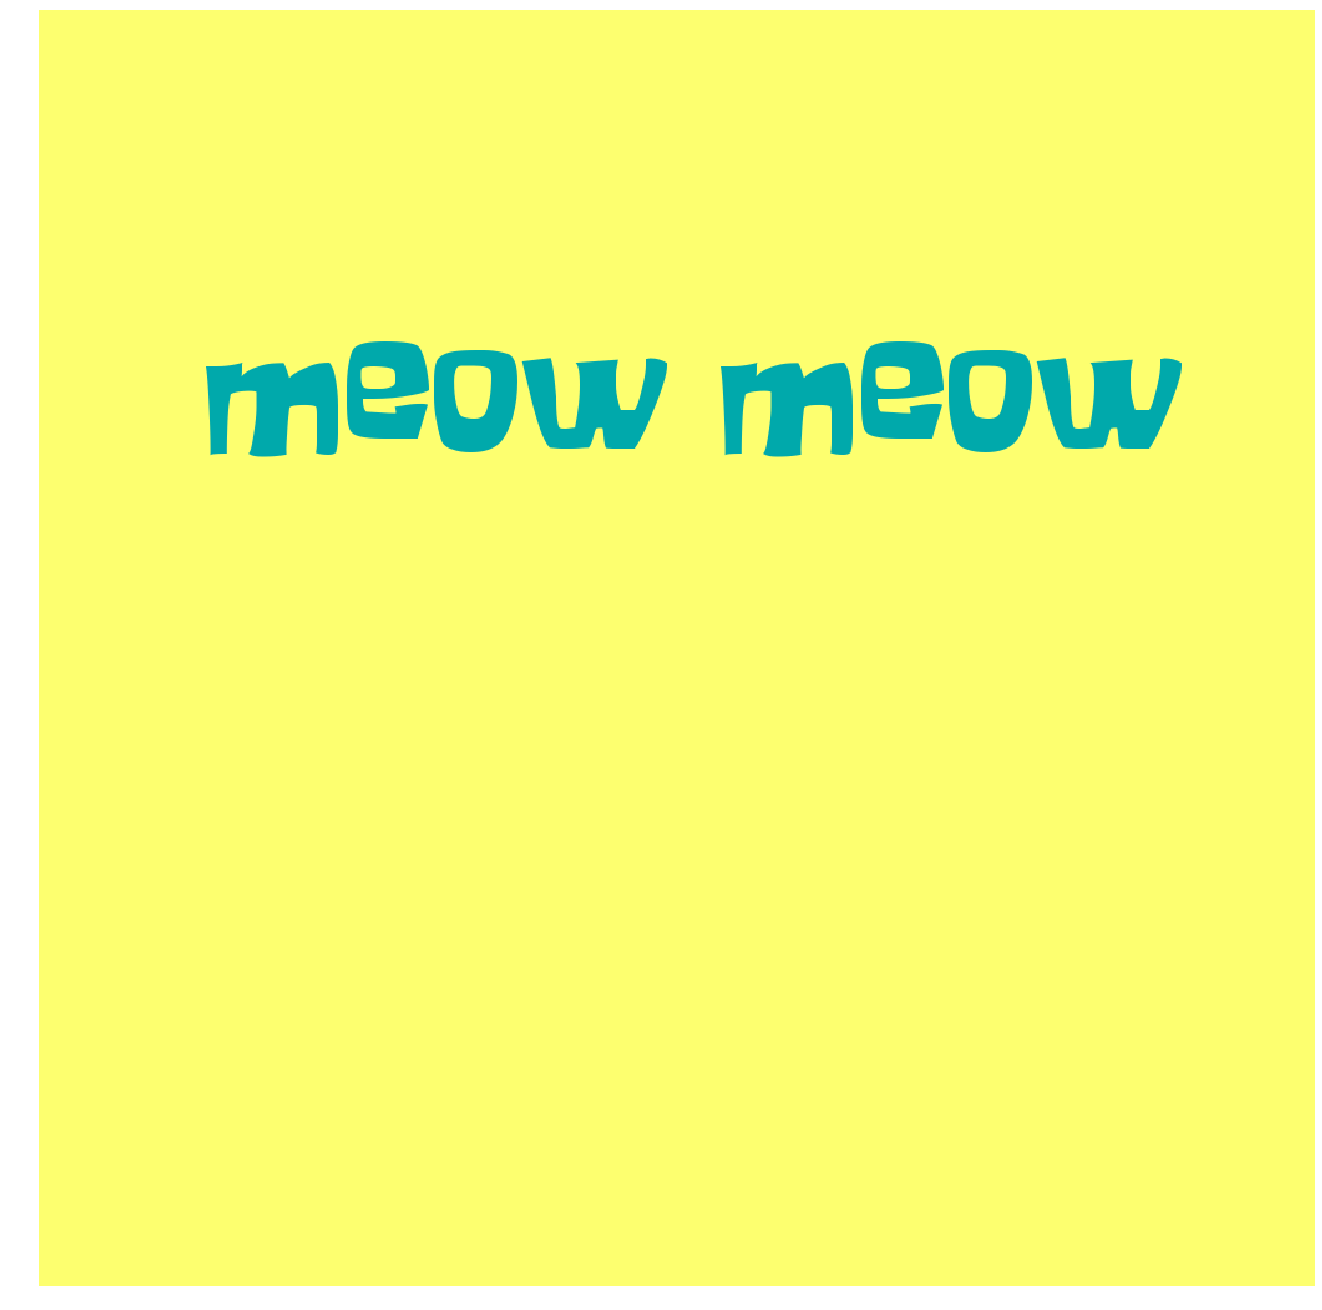

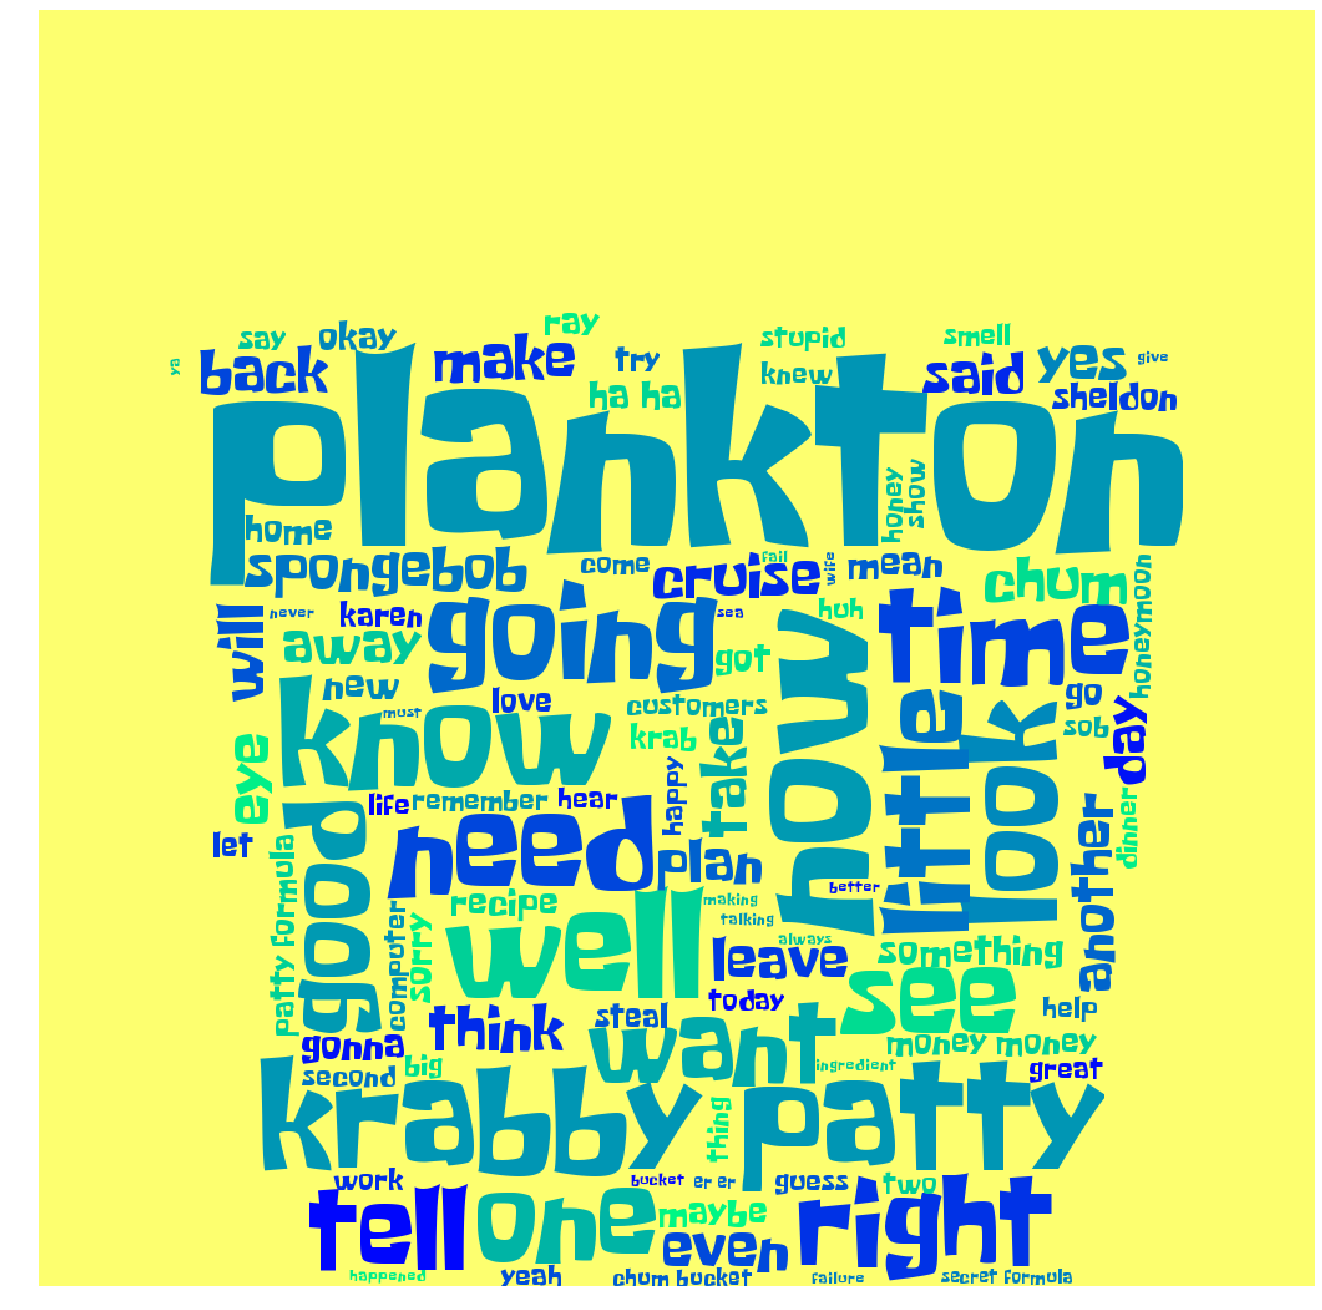

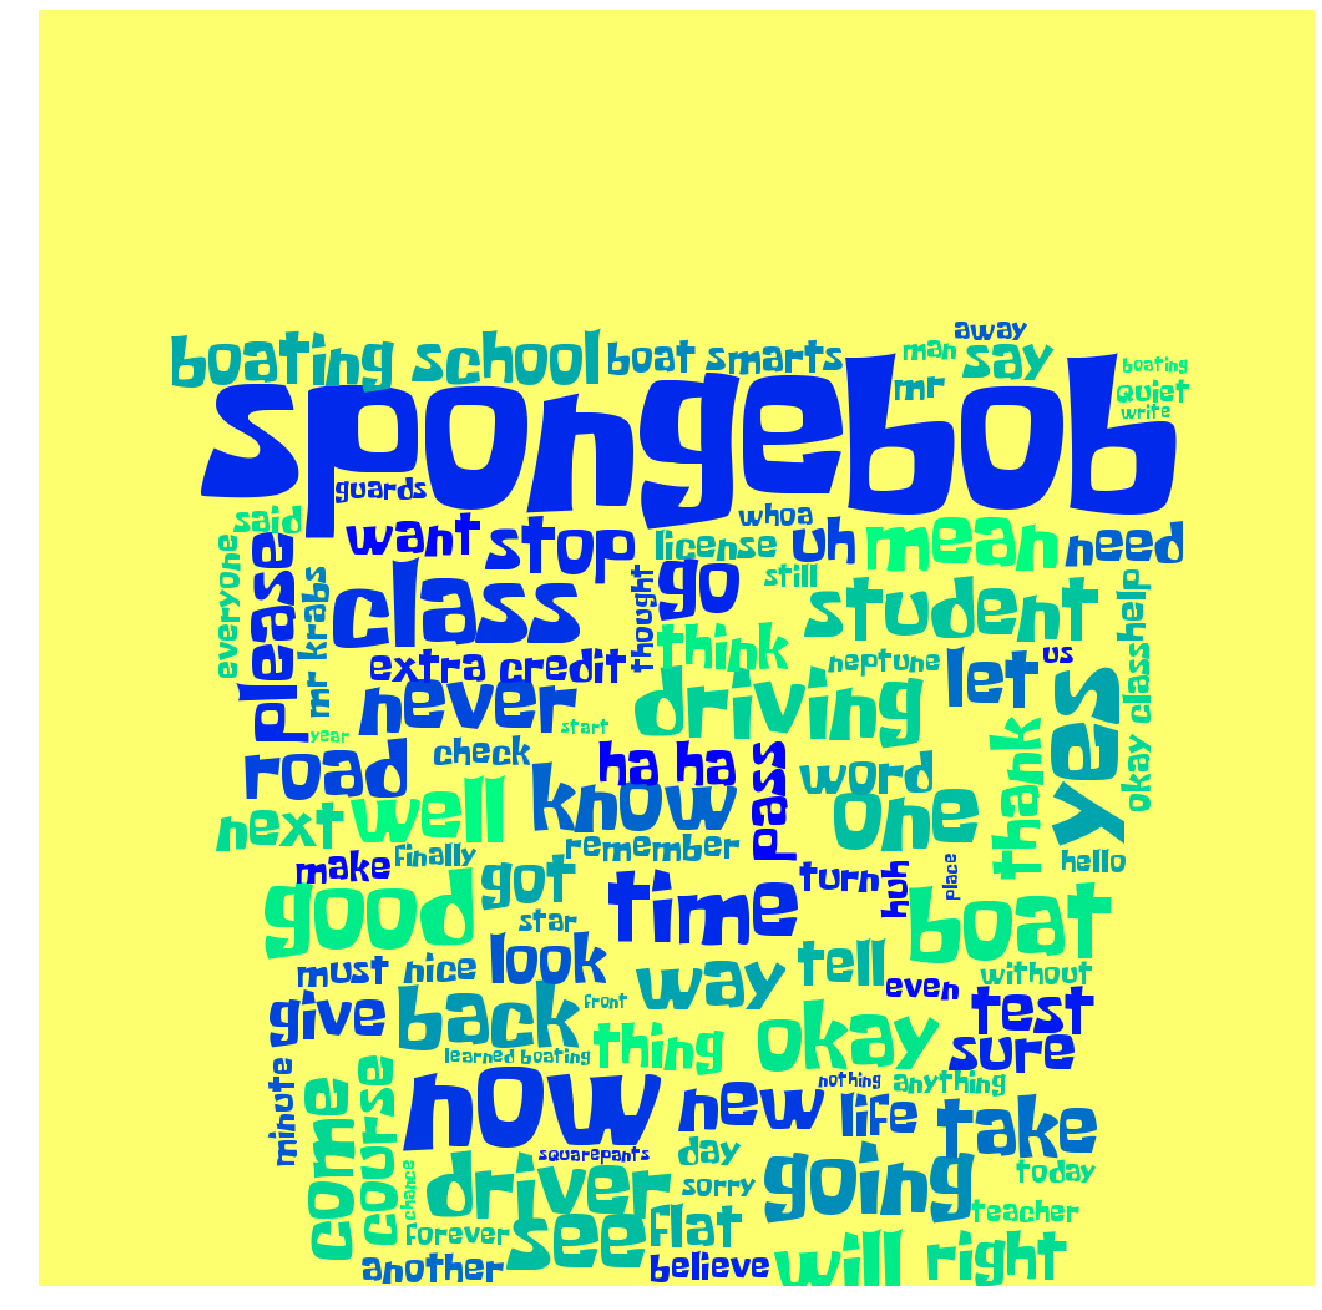

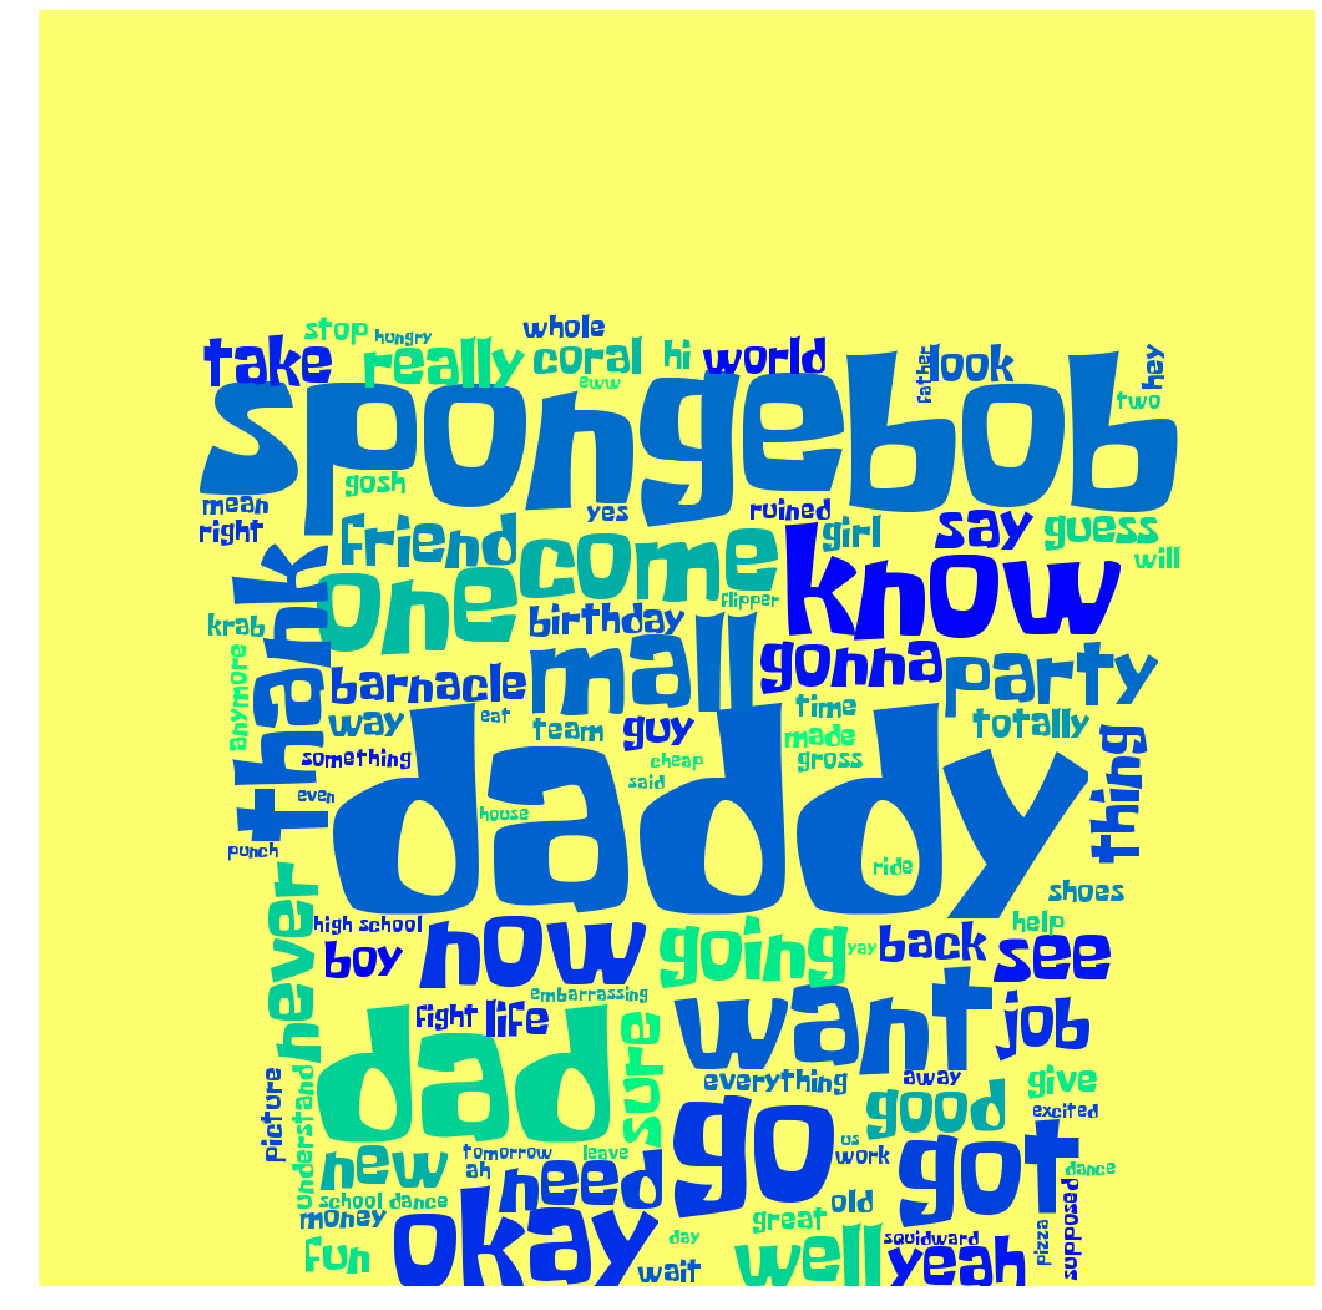

In [13]:
# plot the word clouds  

mask = np.array(Image.open("sponge.png"))
def plot_cloud(name):
    max_words=100
    stopwords = set(STOPWORDS)
    stopwords.add('oh')
    if name=='Gary':
        max_words=1
    if name=='SpongeBob':
        stopwords.remove('i')
        stopwords.remove('am')
    wordcloud = WordCloud(width=1800,height=1800,
                    mask = mask,
                    background_color ='#FDFF6F',
                    colormap="winter",
                    stopwords = stopwords, 
                    max_words=max_words, 
                    font_path = 'Spongeboy_Me_Bob.ttf',
                    min_font_size = 10,
                    max_font_size = 200).generate(get_words(name)) 

    fig = plt.figure(figsize = (18, 18), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.savefig(name+'.png')

for name in chars:
    plot_cloud(name)